In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import funcoes as func

# Remoção apenas para fins estéticos do Notebook
import warnings
warnings.filterwarnings('ignore')

Dados Usados:

Importando os datasets separados

In [28]:
agents_vct2021 = pd.read_csv('datasets-criados/agents_pick_vct2021.csv')
agents_vct2022 = pd.read_csv('datasets-criados/agents_pick_vct2022.csv')
agents_vct2023 = pd.read_csv('datasets-criados/agents_pick_vct2023.csv')


maps_vct2021 = pd.read_csv('datasets-criados/maps_vct2021.csv')
maps_vct2022 = pd.read_csv('datasets-criados/maps_vct2022.csv')
maps_vct2023 = pd.read_csv('datasets-criados/maps_vct2023.csv')


Pré Processamento dos dados

Limpeza de dados

In [29]:
agents_vct = pd.concat([agents_vct2021, agents_vct2022, agents_vct2023], axis=0)
agents_vct.rename(columns={'Pick Rate': 'Pick Rate (%)'}, inplace = True)

maps_vct = pd.concat([maps_vct2021,maps_vct2022,maps_vct2023], axis= 0)


In [30]:
roles = {'astra':'Controlador', 'brimstone':'Controlador', 'viper':'Controlador', 'omen':'Controlador', 'harbor':'Controlador',
         'killjoy':'Sentinela', 'cypher':'Sentinela', 'chamber':'Sentinela', 'sage':'Sentinela', 'deadlock':'Sentinela',
         'phoenix':'Duelista', 'jett':'Duelista', 'reyna':'Duelista', 'raze':'Duelista', 'iso':'Duelista', 'neon':'Duelista','yoru':'Duelista',
         'sova':'Iniciador', 'skye':'Iniciador', 'kay/o':'Iniciador', 'breach':'Iniciador', 'fade':'Iniciador', 'gekko':'Iniciador'}

agents_vct['Roles'] = agents_vct['Agent'].map(roles)

agents_vct


,Agent,Pick Rate (%),Roles
0,astra,65.00,Controlador
1,breach,13.40,Iniciador
2,brimstone,1.60,Controlador
3,chamber,0.00,Sentinela
4,cypher,34.60,Sentinela
...,...,...,...
18,sage,2.50,Sentinela
19,skye,50.50,Iniciador
20,sova,31.50,Iniciador
21,viper,40.50,Controlador


<h4>Quais agentes estão sendo escolhidos com mais frequência ao longo do tempo?</h4>

In [31]:
agents = agents_vct['Agent'].unique()
for i in agents:
    print('\n',i,'\n')
    print(func.descricao_tabela(agents_vct,'Agent',i))


 astra 

       Pick Rate (%)
count       3.000000
mean       38.166667
std        23.718839
min        20.000000
25%        24.750000
50%        29.500000
75%        47.250000
max        65.000000

 breach 

       Pick Rate (%)
count        3.00000
mean        24.60000
std          9.86509
min         13.40000
25%         20.90000
50%         28.40000
75%         30.20000
max         32.00000

 brimstone 

       Pick Rate (%)
count        3.00000
mean        13.45000
std         10.39026
min          1.60000
25%          9.67500
50%         17.75000
75%         19.37500
max         21.00000

 chamber 

       Pick Rate (%)
count       3.000000
mean       28.450000
std        40.326883
min         0.000000
25%         5.375000
50%        10.750000
75%        42.675000
max        74.600000

 cypher 

       Pick Rate (%)
count       3.000000
mean       18.166667
std        15.275580
min         4.400000
25%         9.950000
50%        15.500000
75%        25.050000
max        34.6000

<h4>Gráfico da Porcentagem de Escolha dos Agentes</h4>

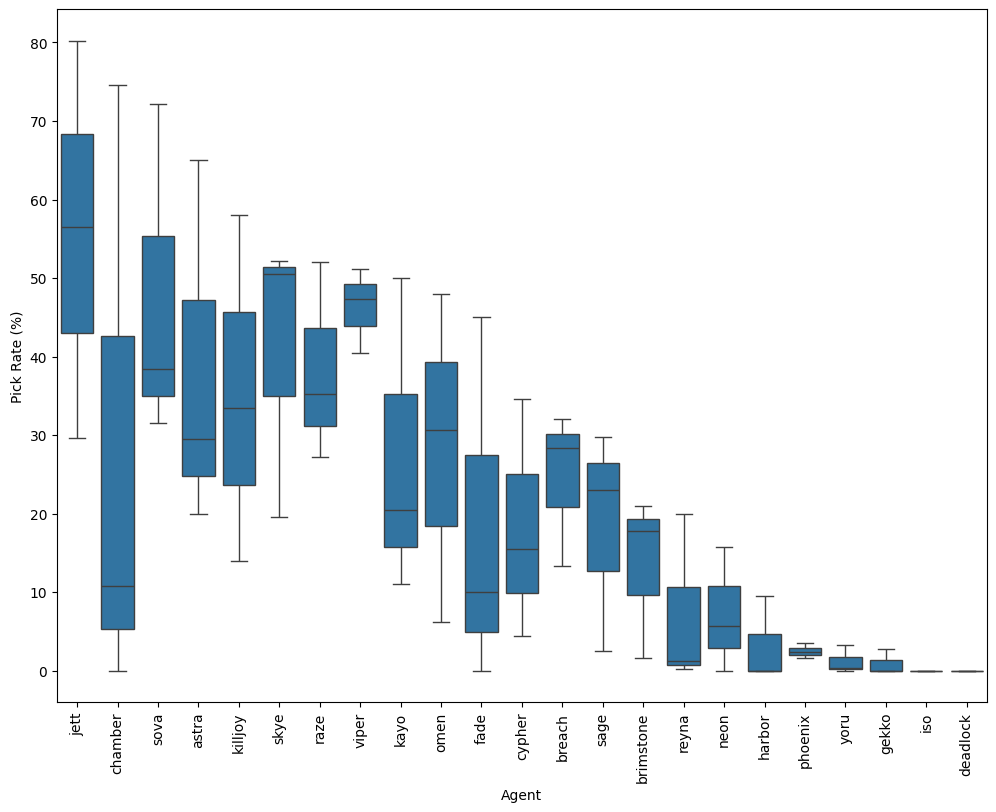

In [32]:
#Plotando o gráfico de colunas
plt.figure(figsize=(12, 9))
sns.boxplot(x='Agent', y='Pick Rate (%)', data=agents_vct, order=agents_vct.sort_values('Pick Rate (%)', ascending=False)['Agent'])
plt.xticks(rotation=90)
plt.show()

Qual a taxa de escolha dos agentes pela sua Role?

In [33]:
#Plotando o gráfico


<h4>Qual é a distribuição percentual de vitórias na defesa e no ataque nos mapas jogados?</h4>

In [34]:
maps = maps_vct['Map'].unique()
for i in maps:
    print('\n',i,'\n')
    print(func.descricao_tabela(maps_vct,'Map',i))



 Ascent 

       Attacker Side Win Percentage  Defender Side Win Percentage
count                      3.000000                      3.000000
mean                      47.600000                     52.400000
std                        3.078961                      3.078961
min                       45.000000                     49.000000
25%                       45.900000                     51.100000
50%                       46.800000                     53.200000
75%                       48.900000                     54.100000
max                       51.000000                     55.000000

 Bind 

       Attacker Side Win Percentage  Defender Side Win Percentage
count                      3.000000                      3.000000
mean                      49.466667                     50.533333
std                        2.928026                      2.928026
min                       46.800000                     47.400000
25%                       47.900000                     

<h4>Gráfico da Porcentagem de Vitórias no Lado Atacante</h4>

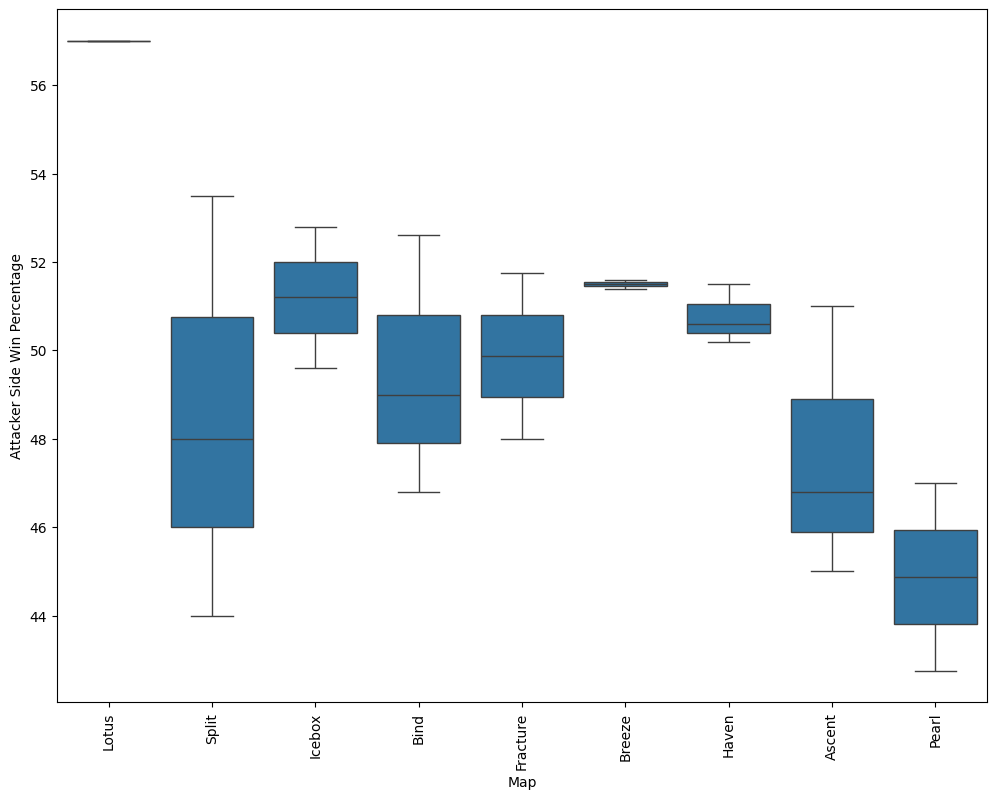

In [35]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Map', y='Attacker Side Win Percentage', data = maps_vct, order = maps_vct.sort_values('Attacker Side Win Percentage', ascending=False)['Map'])
plt.xticks(rotation=90)
plt.show()

<h4>Gráfico da Porcentagem de Vitórias no Lado Defensor</h4>

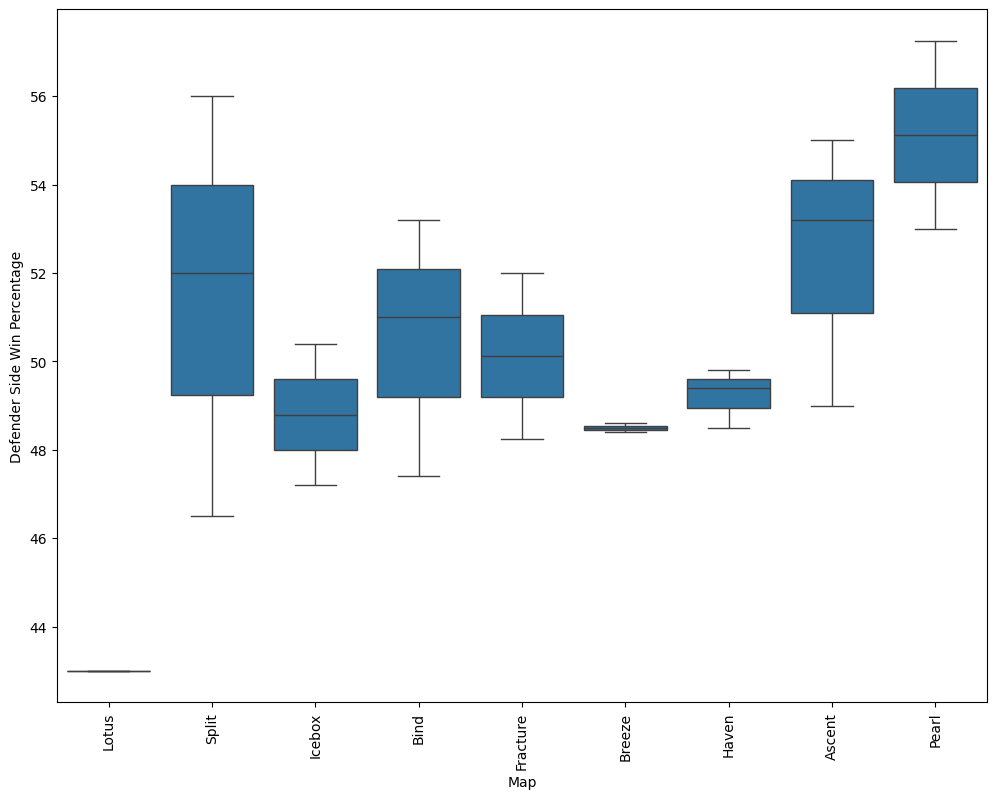

In [36]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Map', y='Defender Side Win Percentage', data=maps_vct, order=maps_vct.sort_values('Attacker Side Win Percentage', ascending=False)['Map'])
plt.xticks(rotation=90)
plt.show()

In [37]:
maps_vct_2_years= pd.merge(maps_vct2021, maps_vct2022, on='Map', how='outer')

maps_vct_total = pd.merge (maps_vct_2_years, maps_vct2023, on='Map', how='outer')

maps_vct_total = maps_vct_total.fillna(0, inplace=False)

maps_vct_total

,Map,Attacker Side Win Percentage_x,Defender Side Win Percentage_x,Attacker Side Win Percentage_y,Defender Side Win Percentage_y,Attacker Side Win Percentage,Defender Side Win Percentage
0,Ascent,46.8,53.2,45.0,55.0,51.00,49.00
1,Bind,46.8,53.2,52.6,47.4,49.00,51.00
2,Breeze,51.6,48.4,51.4,48.6,0.00,0.00
3,Fracture,0.0,0.0,48.0,52.0,51.75,48.25
4,Haven,50.6,49.4,50.2,49.8,51.50,48.50
5,Icebox,52.8,47.2,49.6,50.4,0.00,0.00
6,Lotus,0.0,0.0,0.0,0.0,57.00,43.00
7,Pearl,0.0,0.0,47.0,53.0,42.75,57.25
8,Split,44.0,56.0,48.0,52.0,53.50,46.50


In [38]:
maps_vct_total.loc[maps_vct_total['Map'] == 'Lotus', 'Attacker Side Win Percentage_x'] = 57.00
maps_vct_total.loc[maps_vct_total['Map'] == 'Lotus', 'Defender Side Win Percentage_x'] = 43.00

maps_vct_total.loc[maps_vct_total['Map'] == 'Lotus', 'Attacker Side Win Percentage_y'] = 57.00
maps_vct_total.loc[maps_vct_total['Map'] == 'Lotus', 'Defender Side Win Percentage_y'] = 43.00

maps_vct_total.loc[maps_vct_total['Map'] == 'Fracture', 'Attacker Side Win Percentage_x'] = round(((48.00 + 51.75 ) / 2) ,1)
maps_vct_total.loc[maps_vct_total['Map'] == 'Fracture', 'Defender Side Win Percentage_x'] = round(((52.00 + 48.25 ) / 2) ,1)

maps_vct_total.loc[maps_vct_total['Map'] == 'Pearl', 'Attacker Side Win Percentage_x'] = round(((47.00 + 42.75) / 2) ,1)
maps_vct_total.loc[maps_vct_total['Map'] == 'Pearl', 'Defender Side Win Percentage_x'] = round(((53.00 + 57.25) / 2) ,1)

maps_vct_total.loc[maps_vct_total['Map'] == 'Breeze', 'Attacker Side Win Percentage'] = round(((51.6 + 51.4) / 2) ,1)
maps_vct_total.loc[maps_vct_total['Map'] == 'Breeze', 'Defender Side Win Percentage'] = round(((48.4  + 48.6) / 2) ,1)

maps_vct_total.loc[maps_vct_total['Map'] == 'Icebox', 'Attacker Side Win Percentage'] = round(((52.8 + 49.6) / 2) ,1)
maps_vct_total.loc[maps_vct_total['Map'] == 'Icebox', 'Defender Side Win Percentage'] = round(((47.2  + 50.4) / 2) ,1)


maps_vct_total


,Map,Attacker Side Win Percentage_x,Defender Side Win Percentage_x,Attacker Side Win Percentage_y,Defender Side Win Percentage_y,Attacker Side Win Percentage,Defender Side Win Percentage
0,Ascent,46.8,53.2,45.0,55.0,51.00,49.00
1,Bind,46.8,53.2,52.6,47.4,49.00,51.00
2,Breeze,51.6,48.4,51.4,48.6,51.50,48.50
3,Fracture,49.9,50.1,48.0,52.0,51.75,48.25
4,Haven,50.6,49.4,50.2,49.8,51.50,48.50
5,Icebox,52.8,47.2,49.6,50.4,51.20,48.80
6,Lotus,57.0,43.0,57.0,43.0,57.00,43.00
7,Pearl,44.9,55.1,47.0,53.0,42.75,57.25
8,Split,44.0,56.0,48.0,52.0,53.50,46.50


In [39]:
maps_vct_total['Total Attacker Side Win Percentage'] = maps_vct_total[['Attacker Side Win Percentage_x', 'Attacker Side Win Percentage_y', 'Attacker Side Win Percentage']].mean(axis=1).round(2)

maps_vct_total['Total Defender Side Win Percentage'] = maps_vct_total[['Defender Side Win Percentage_x', 'Defender Side Win Percentage_y', 'Defender Side Win Percentage']].mean(axis=1).round(2)


maps_vct_final =  pd.concat([maps_vct_total['Map'], maps_vct_total['Total Attacker Side Win Percentage'], maps_vct_total ['Total Defender Side Win Percentage']], axis=1)

maps_vct_final = maps_vct_final.fillna(0, inplace=False)

maps_vct_final

,Map,Total Attacker Side Win Percentage,Total Defender Side Win Percentage
0,Ascent,47.60,52.40
1,Bind,49.47,50.53
2,Breeze,51.50,48.50
3,Fracture,49.88,50.12
4,Haven,50.77,49.23
5,Icebox,51.20,48.80
6,Lotus,57.00,43.00
7,Pearl,44.88,55.12
8,Split,48.50,51.50


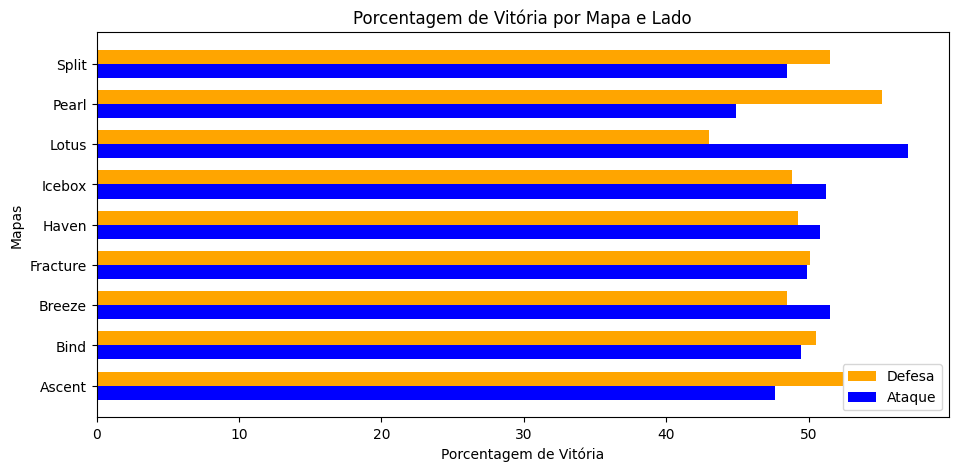

In [40]:
import funcoes as func
func.mostraGraficoMap(maps_vct_final)

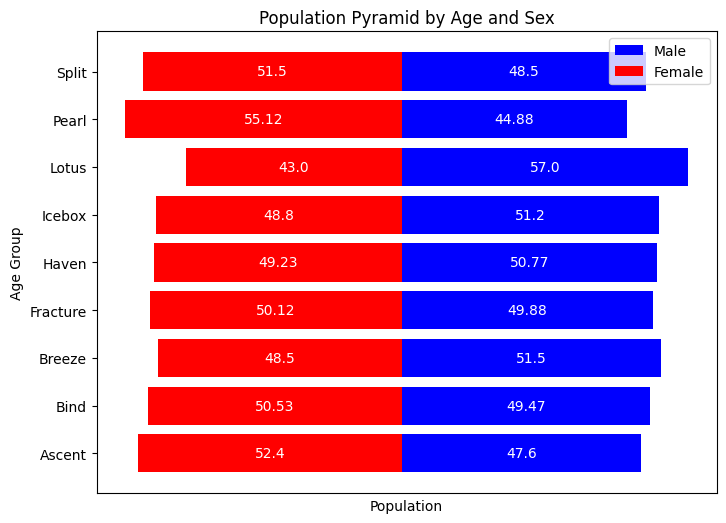

In [41]:
age_groups = maps_vct_final["Map"]
male_population = maps_vct_final["Total Attacker Side Win Percentage"]
female_population = maps_vct_final["Total Defender Side Win Percentage"]

# Create population pyramid
fig, ax = plt.subplots(figsize=(8, 6))

# Plot male population
ax.barh(age_groups, male_population, color='blue', align='center', label='Male')

# Plot female population with negative values to create pyramid
ax.barh(age_groups, [-val for val in female_population], color='red', align='center', label='Female')

# Add labels for each value
for i, (male_val, female_val) in enumerate(zip(male_population, female_population)):
    ax.text(male_val / 2, i, str(male_val), ha='center', va='center', color='white')
    ax.text(-female_val / 2, i, str(female_val), ha='center', va='center', color='white')

# Add labels and title
ax.set_xlabel('Population')
ax.set_ylabel('Age Group')
ax.set_title('Population Pyramid by Age and Sex')

# Hide negative values on the y-axis
ax.set_xticks([])

# Add legend
ax.legend()

plt.show()

In [42]:


df_joined = pd.merge(agents_vct2021, agents_vct2022, on='Agent', how='outer')

agente_joined = pd.merge(df_joined, agents_vct2023, on='Agent', how='outer')

agente_joined

,Agent,Pick Rate_x,Pick Rate_y,Pick Rate
0,astra,65.0,20.0,29.50
1,breach,13.4,28.4,32.00
2,brimstone,1.6,21.0,17.75
3,chamber,0.0,74.6,10.75
4,cypher,34.6,4.4,15.50
5,deadlock,0.0,0.0,0.00
6,fade,0.0,45.0,10.00
7,gekko,0.0,0.0,2.75
8,harbor,0.0,0.0,9.50
9,iso,0.0,0.0,0.00


In [43]:
agente_joined['Pick Rate (%)'] = agente_joined[['Pick Rate_x', 'Pick Rate_y', 'Pick Rate']].mean(axis=1).round(2)


nova_tabela_agent = pd.concat([agente_joined['Agent'], agente_joined['Pick Rate (%)']], axis=1)

nova_tabela_agent

,Agent,Pick Rate (%)
0,astra,38.17
1,breach,24.60
2,brimstone,13.45
3,chamber,28.45
4,cypher,18.17
5,deadlock,0.00
6,fade,18.33
7,gekko,0.92
8,harbor,3.17
9,iso,0.00


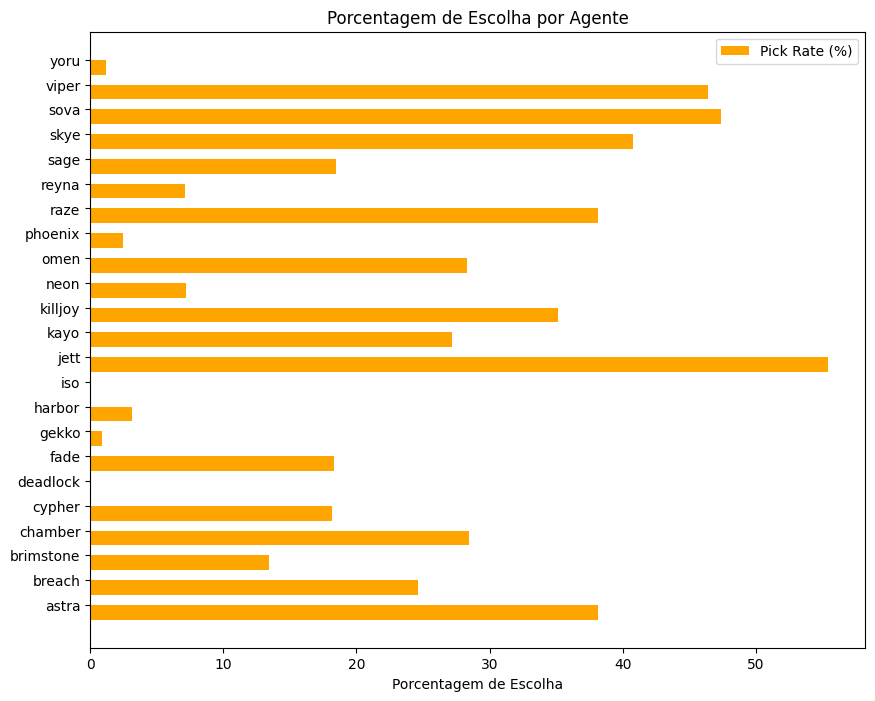

In [44]:
func.mostraGraficoAgent(nova_tabela_agent)